# **Classifying and Summarizing Arabic Text: Traditional vs Modern Approaches**

**Course Title**: Natural Language Processing  
**Course Code**: CS365  
**Instructor**: Dr. Fahman Saeed  
**Team Members**: Norah Altwijri، Noura Abuthnain

# **1. Introduction**


*   **Project Overview and Objectives**: This project aims to explore and compare traditional machine learning methods and modern deep learning and transformer-based approaches for two important Arabic Natural Language Processing (NLP) tasks: text classification and text summarization. The goal is to assess how well different techniques handle Arabic text by implementing and evaluating both approaches on the same dataset. The project was carried out in three phases. In the traditional phase, we used Support Vector Machines (SVM) for text classification and applied Term Frequency–Inverse Document Frequency (TF-IDF) for text summarization. The modern phase was divided into two parts: (1) the deep learning approach, where we implemented Bidirectional Long Short-Term Memory (BiLSTM) and Recurrent Neural Network (RNN) for text classification, along with pretrained abstractive summarization using the mT5 pointer-generator model; and (2) the transformer-based approach, where we used AraBERT (Arabic BERT) for text classification and BERT-based extractive summarization. Finally, in the comparative analysis phase, we evaluated the performance and efficiency of all models across various metrics. This comparison highlights the strengths, limitations, and best-use scenarios for each method in Arabic NLP, offering practical guidance for real-world applications.

*   **Chosen Dataset and Tasks**: We selected the Arabic Articles Dataset, a structured collection of Arabic newspaper articles sourced from the alaybaa Corpus. The dataset is organized into ten thematic categories: Sport, Art, Health, Economy, Local, Tourism, Technology, Car, Entertainment, and Politics. Each article is stored in a separate text file, where the first line represents the title and the following lines form the body of the article. This setup makes the dataset extremely suitable for text classification, where the goal is to predict the article’s topic based on its content, and text summarization, where the goal is to generate short summaries of longer Arabic texts. The dataset provides a valuable resource for evaluating different NLP approaches designed for Arabic, especially in terms of preprocessing, feature extraction, and modeling challenges.

*   **Challenges in Arabic NLP**: Compared to high-resource languages like English, Arabic has several distinct obstacles in natural language processing (NLP). The complex morphology of Arabic, where a single root word can generate multiple inflected forms due to rich grammatical structures involving gender, number, and case, is one of the main challenges. Furthermore, orthographic ambiguity, like the optional use of diacritical marks, can have significant effects on meaning and make accurate tokenization and semantic analysis more challenging. The use of clitics (such as conjunctions, prepositions, and pronouns) in Arabic words complicates tokenization and segmentation. Moreover, while Modern Standard Arabic (MSA) is used in formal writing, the coexistence of regional dialects creates further linguistic variation. Lastly, the development and assessment of strong models are limited by the relative lack of annotated Arabic corpora and resources. To guarantee successful NLP solutions suited to Arabic, these difficulties need careful preprocessing and model adaptation.

# **2. Data Exploration and Preprocessing**

In [ ]:
# Clone the repository
!git clone https://github.com/alaybaa/ArabicArticlesDataset.git

# Navigate into the dataset directory
%cd ArabicArticlesDataset

# List the contents to verify
!ls


Cloning into 'ArabicArticlesDataset'...
remote: Enumerating objects: 500265, done.
remote: Total 500265 (delta 0), reused 0 (delta 0), pack-reused 500265 (from 1)
Receiving objects: 100% (500265/500265), 497.60 MiB | 7.95 MiB/s, done.
Resolving deltas: 100% (173/173), done.
Updating files: 100% (500726/500726), done.
/content/ArabicArticlesDataset
aawsat.com	      aleqt.com		   bbc.com:arabic     README.md
aitnews.com	      almuraba.net	   ienalwatan.com
akhbaar24.argaam.com  alsyahaalarabia.com  ksa.motory.com:ar
alarabiya.net	      alwatan.com.sa	   neprass.org


In [ ]:
import os
import pandas as pd

# Directory where the dataset was cloned
base_path = "/content/ArabicArticlesDataset"

# Initialize lists
titles = []
contents = []
categories = []

# Walk through all subfolders and files, skipping hidden folders like .git
for source in os.listdir(base_path):
    source_path = os.path.join(base_path, source)

    if os.path.isdir(source_path) and not source.startswith("."):  # skip .git etc.
        for category in os.listdir(source_path):
            category_path = os.path.join(source_path, category)

            if os.path.isdir(category_path) and not category.startswith("."):
                for filename in os.listdir(category_path):
                    file_path = os.path.join(category_path, filename)

                    # Skip folders accidentally included
                    if os.path.isdir(file_path):
                        continue

                    try:
                        with open(file_path, "r", encoding="utf-8") as f:
                            lines = f.readlines()
                            title = lines[0].strip() if lines else ""
                            body = ' '.join(line.strip() for line in lines[1:])

                            titles.append(title)
                            contents.append(body)
                            categories.append(category)  # folder name = label
                    except Exception as e:
                        print(f"Skipping {file_path}: {e}")

# Create DataFrame
df = pd.DataFrame({
    "title": titles,
    "content": contents,
    "category": categories
})

# Preview the result
df.sample(10)


,title,content,category
405044,الدعيع : الخليوي وسالم يستحقان التكريم .. شكرً...,أشاد حارس الهلال والمنتخب السعودي السابق محمد...,Sport
247764,حمى انتخابية تشتعل بين ترمب وأوباما.. أردتها ح...,تغريدات أطلقها الرئيس الأميركي، دونالد ترمب، ...,Politics
186370,رئيس حكومة اليمن: لن يستقيم السلام ما لم تقطع ...,رئيس الحكومة اليمنية معين عبدالملك، اليوم الأ...,Politics
262005,مخاطر السجائر الإلكترونية المحتملة تدفع فرنسا ...,وزير الصحة الفرنسي منع تدخين السجائر الإلكترو...,Health
146138,صندوق الثروة النرويجي يربح 123 مليار دولار في ...,صندوق الثروة السيادي النرويجي، الأضخم في العا...,Economy
461529,راموس: يجب أن نكون حذرين من العين,يرى سيرخيو راموس مدافع الفريق الأول لكرة القد...,Sport
284466,وزير الصحة يوجه رسالة مهمة للمواطنين والمقيمين,وجه وزير الصحة الدكتور توفيق الربيعة، اليوم ا...,Local
226266,"التحالف يعترض صاروخا من اليمن.. ويعتبره ""تصعيد...",قيادة تحالف دعم الشرعية في اليمن، في بيان لها...,Politics
266547,تعرف على 7 أخطاء تدمر الجهاز الهضمي,تعاني من الإحساس الدائم باضطرابات المعدة عند ...,Health
123103,فتح باب التسجيل في منافسات البطولات المجتمعية ...,ن الاتحاد السعودي للرياضات الإلكترونية، الجهة...,Sport


In [ ]:
# Display general info
df.info()

# Display number of rows and columns
print("Shape:", df.shape)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Display number of unique categories
print("\nNumber of unique categories:", df['category'].nunique())
print("Categories:", df['category'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500725 entries, 0 to 500724
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     500725 non-null  object
 1   content   500725 non-null  object
 2   category  500725 non-null  object
dtypes: object(3)
memory usage: 11.5+ MB
Shape: (500725, 3)

Missing values per column:
title       0
content     0
category    0
dtype: int64

Number of unique categories: 10
Categories: ['Car' 'Technology' 'Health' 'Entertainment' 'Tourism' 'Sport' 'Art'
 'Economy' 'Politics' 'Local']


<ipython-input-5-1314b62d2449>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')


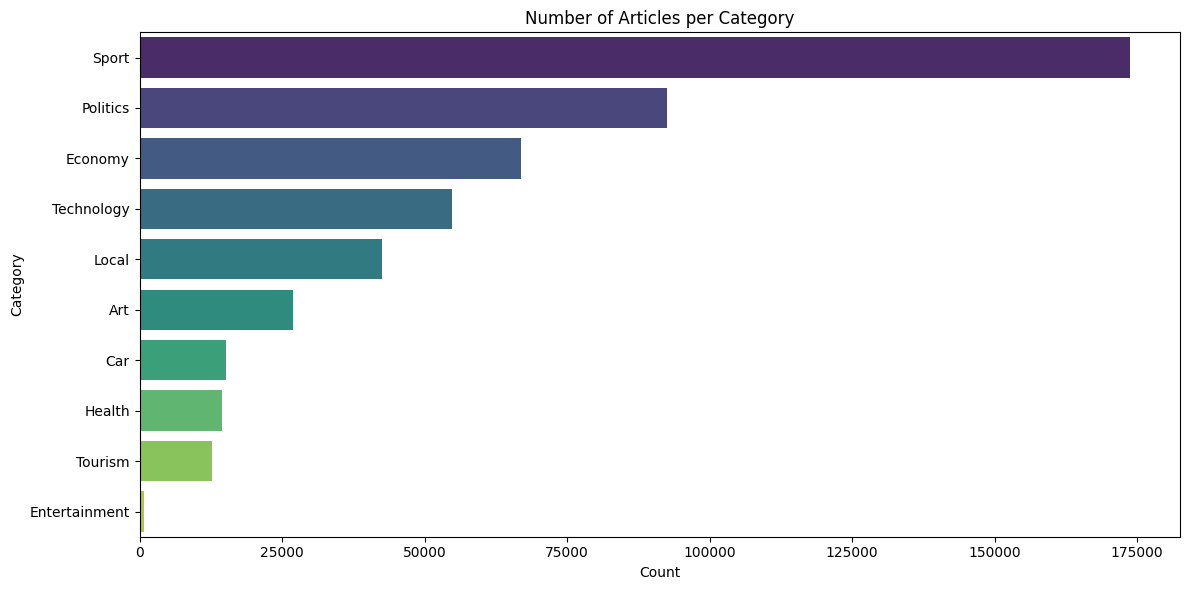

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of categories
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')
plt.title('Number of Articles per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


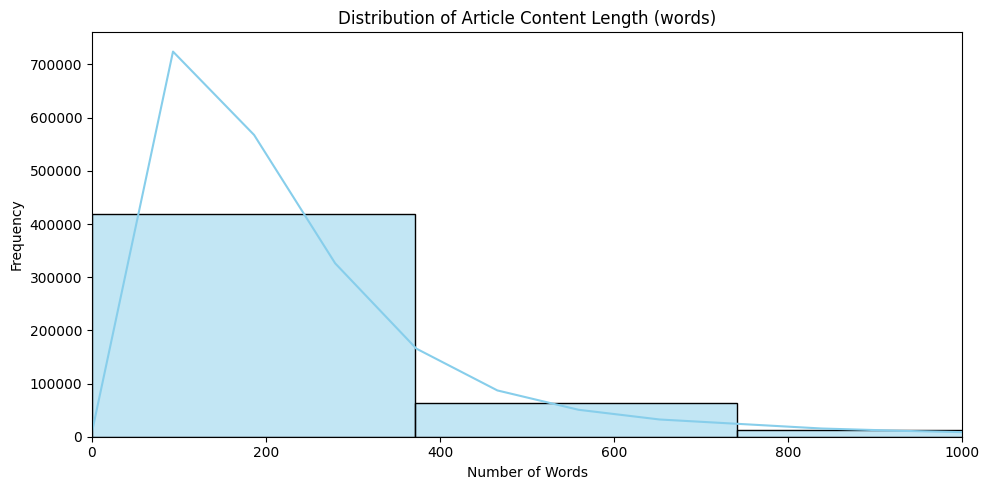

In [ ]:
# Add a new column for content length (in words)
df['content_length'] = df['content'].apply(lambda x: len(x.split()))

# Plot distribution of article lengths
plt.figure(figsize=(10,5))
sns.histplot(df['content_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Article Content Length (words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()


In [ ]:
# Install libraries for Arabic text preprocessing and natural language processing
!pip install pyarabic nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 8.0 MB/s eta 0:00:00


In [ ]:
import re
import string
import pyarabic.araby as araby
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
import nltk

# Download Arabic stopwords
nltk.download('stopwords')

# Arabic stopwords
arabic_stopwords = set(stopwords.words("arabic"))

# Character normalization
def normalize_arabic(text):
    text = re.sub(r"[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ي", text)
    text = re.sub("ة", "ه", text)
    return text

# Full preprocessing function
def preprocess_arabic(text):
    # Remove diacritics
    text = araby.strip_tashkeel(text)

    # Normalize
    text = normalize_arabic(text)

    # Remove punctuations and digits
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", " ", text)

    # Tokenize and remove stopwords
    words = text.split()
    words = [w for w in words if w not in arabic_stopwords]

    # Stemming
    stemmer = ISRIStemmer()
    words = [stemmer.stem(w) for w in words]

    return ' '.join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Apply to content column
df['clean_content'] = df['content'].apply(preprocess_arabic)

# Preview
df[['content', 'clean_content']].head()

,content,clean_content
0,وصلت سيارة كيا بيجاس سيدان المدمجة الجديدة إل...,وصل سير كيا يجس سيد دمج جدد الي سوق ملك عرب وك...
1,وصلت كيا سورينتو 2020 إلى المملكة العربية الس...,وصل كيا رينتو الي ملك عرب سعد لدي وكل كيا جبر ...
2,في وسط الأجواء المشحونة بالولايات المتحدة الأ...,وسط جوء شحن ولي تحد امر اثر جرء ريس رمب عنصر ف...
3,بدأت الإدارة العامة للمرور في المملكة بإصدار ...,بدت دره عمه رور ملك صدر رخص قيد ركب خصه خصص نق...
4,احتفلت شركة إبراهيم الجفالي وإخوانه للسيارات ...,حفل شرك راهيم جفل وخا سير كلء سير مرسيدس بنز م...


# **3. Phase 1: Traditional Approaches**

### **Task One: Text Classification Using Support Vector Machines (SVM)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize cleaned content
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_content'])
y = df['category']

In [ ]:
# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train SVM
# Initialize the Linear SVM model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [ ]:
# Use the trained model to predict categories for the test set
y_pred = svm_model.predict(X_test)

print("SVM Classification Accuracy:", accuracy_score(y_test, y_pred))
print("____________________________________________\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM Classification Accuracy: 0.9389285535972839
____________________________________________


Classification Report:
                precision    recall  f1-score   support

          Art       0.91      0.90      0.91      5310
          Car       0.93      0.92      0.92      3031
      Economy       0.88      0.90      0.89     13462
Entertainment       0.70      0.52      0.60       162
       Health       0.91      0.92      0.91      2859
        Local       0.87      0.85      0.86      8661
     Politics       0.93      0.94      0.94     18621
        Sport       0.99      0.99      0.99     34664
   Technology       0.96      0.96      0.96     10798
      Tourism       0.84      0.80      0.82      2577

     accuracy                           0.94    100145
    macro avg       0.89      0.87      0.88    100145
 weighted avg       0.94      0.94      0.94    100145



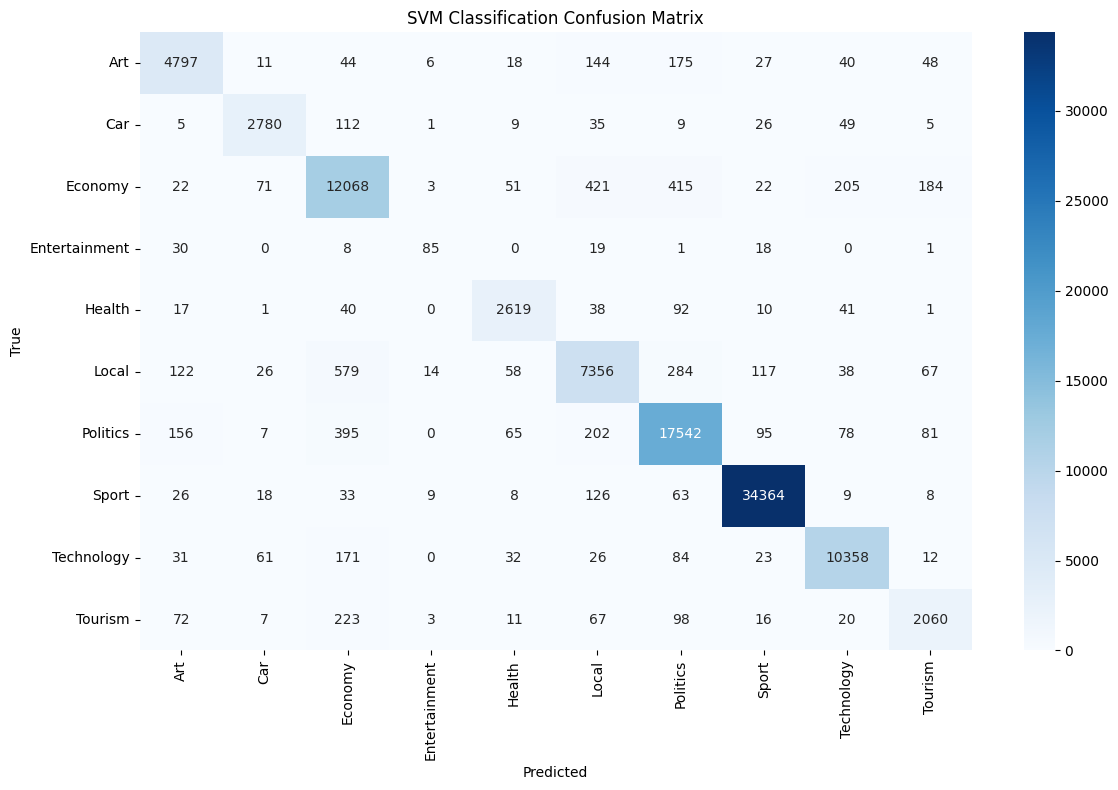

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Classification Confusion Matrix")
plt.tight_layout()
plt.show()

Based on the provided classification report, the SVM model demonstrates very high precision and recall for categories such as Sport, Technology, and Politics, indicating that these classes are consistently and accurately identified. However, performance in the Entertainment class is notably weaker, likely due to its limited representation in the dataset and potential thematic overlap with other categories. While the overall accuracy is excellent at **93.9%**, further investigation into the balance between precision and recall, especially for underrepresented classes, could enhance the model’s fairness and generalization. Strategies such as data augmentation, resampling, or applying class weighting may help address these disparities and boost performance across all categories.

### **Task Two: Text Summarization Using Term Frequency-Inverse Document Frequency (TF-IDF)**



In [ ]:
import re

def split_arabic_sentences(text):
    # Replace Arabic punctuation with periods for consistent splitting
    text = re.sub(r'[؟!\n؛]', '.', text)
    sentences = [s.strip() for s in text.split('.') if len(s.strip()) > 10] #a sentnce isat least 10 words long
    return sentences

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def summarize_arabic_custom_tfidf(text, num_sentences=2):
    sentences = split_arabic_sentences(text)
    if len(sentences) == 0:
        return "النص لا يحتوي على جمل كافية للتلخيص."

    # Vectorize sentences
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences) #Rows: sentences, Columns: unique words, Values: importance of each word in each sentence

    # Score sentences by sum of TF-IDF weights
    scores = np.asarray(tfidf_matrix.sum(axis=1)).ravel() #the importance of the sentence
    ranked_indices = scores.argsort()[::-1][:num_sentences] #sorts the sentences from most important to least important (top 2)

    # Sort selected sentences in original order
    summary_tfidf = [sentences[i] for i in sorted(ranked_indices)]
    return ' '.join(summary_tfidf)

This function uses the TF-IDF (Term Frequency-Inverse Document Frequency) technique to create a simple extractive summary. First, the input Arabic text is split into sentences using a regular expression that replaces Arabic punctuation with periods, and only keeps sentences that are at least 10 characters long. Then, each sentence is vectorized based on the importance of the words it contains — words that appear frequently in a specific sentence but rarely in others are considered more important.
Each sentence gets a score by summing up the TF-IDF values of its words. The top N sentences (with the highest scores) are selected as the summary. Finally, the selected sentences are returned in their original order. This method is fast and works without deep learning, but it often favors keyword-heavy sentences and may ignore sentence structure or meaning.

In [ ]:
# Create a copy of the first 10 rows
df_tfidf = df.head(10).copy()

# Apply the summarization function
df_tfidf['summary'] = df_tfidf['content'].apply(summarize_arabic_custom_tfidf)

# Preview results
df_tfidf[['content', 'summary']].head()

,content,summary
0,سيارة مرسيدس بنز فئة أس الكوبيه الجديدة Merc...,سيارة مرسيدس بنز فئة أس الكوبيه الجديدة Merce...
1,أعلنت رولز رويس عن أحدث إصدار خاص للرايث والذ...,وأوّل 4 موديلات من الرايث تمّ الكشف عنها اليوم...
2,أعلنت شركة عبداللطيف جميل وكيل سيارات تويوتا ...,أعلنت شركة عبداللطيف جميل وكيل سيارات تويوتا ف...
3,في مقال نشره الاستاذ محمد البياتي الكاتب الصح...,في مقال نشره الاستاذ محمد البياتي الكاتب الصحف...
4,بالكاد اعتدنا على أشكال وزوايا للسيارة لامبور...,بالكاد اعتدنا على أشكال وزوايا للسيارة لامبورج...


In [ ]:
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 827.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.2 MB/s eta 0:00:00


In [ ]:
# Evaluation using Semantic Similarity with Sentence-BERT
from sentence_transformers import SentenceTransformer, util

# Load Arabic-compatible multilingual model
sbert_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

def compute_semantic_similarity(article, summary):
    embeddings = sbert_model.encode([article, summary], convert_to_tensor=True)
    return float(util.cos_sim(embeddings[0], embeddings[1]))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Apply to TF-IDF summaries
df_tfidf['semantic_score'] = df_tfidf.apply(
    lambda row: compute_semantic_similarity(row['content'], row['summary']), axis=1
)

In [ ]:
df_tfidf[['content', 'summary', 'semantic_score']].head(10)

,content,summary,semantic_score
0,سيارة مرسيدس بنز فئة أس الكوبيه الجديدة Merc...,سيارة مرسيدس بنز فئة أس الكوبيه الجديدة Merce...,0.943278
1,أعلنت رولز رويس عن أحدث إصدار خاص للرايث والذ...,وأوّل 4 موديلات من الرايث تمّ الكشف عنها اليوم...,0.646884
2,أعلنت شركة عبداللطيف جميل وكيل سيارات تويوتا ...,أعلنت شركة عبداللطيف جميل وكيل سيارات تويوتا ف...,1.000000
3,في مقال نشره الاستاذ محمد البياتي الكاتب الصح...,في مقال نشره الاستاذ محمد البياتي الكاتب الصحف...,1.000000
4,بالكاد اعتدنا على أشكال وزوايا للسيارة لامبور...,بالكاد اعتدنا على أشكال وزوايا للسيارة لامبورج...,1.000000
5,وصلت سيارة رنج روفر سبورت الجديدة كلياً موديل...,وصلت سيارة رنج روفر سبورت الجديدة كلياً موديل ...,1.000000
6,تقارير تفيد بانخفاض عدد مبيعات سيارة سوناتا ف...,ديف زشووسكي الرئيس التنفيذي لشركة هيونداي موتو...,0.888888
7,هيونداي اخيراً تسدل الستار على فيرا كروز من أ...,هيونداي اخيراً تسدل الستار على فيرا كروز من أج...,0.993995
8,ماتياس مولر رئيس فولكس فاجن التنفيذي أكّد عدم...,إلى جانب أنّه لم يلتقي بمارتشيوني منذ عدة أشهر...,0.741561
9,تويوتا كورولا iM، والتي عرفت في الماضي بـ ساي...,وتأتي كورولا 2019 بشاشة عرض لمسية عالية الجودة...,0.743301


This method uses Sentence-BERT, a pretrained transformer model, to compute the cosine similarity between the original article and its generated summary. The resulting score (ranging from 0 to 1) reflects how semantically close the summary is to the original text — a higher score indicates that the summary preserves more of the original meaning.
In the current TF-IDF summarization approach, some summaries receive very high (perfect) semantic similarity scores (e.g., 1), which may appear ideal but can be misleading. This often happens because TF-IDF tends to select entire sentences—or even most of the article, then the summary becomes nearly identical to the input, inflating the semantic score due to surface-level similarity rather than true abstraction. We suggest the following solution for a more accurate evaleuation:

In [ ]:
def compute_compression_ratio(article, summary):
    if not isinstance(article, str) or not isinstance(summary, str):
        return 0.0
    return len(summary) / len(article) if len(article) > 0 else 0.0

def f1_semantic_and_compression(semantic, ratio):
    if semantic + (1 - ratio) == 0:
        return 0.0
    return 2 * (semantic * (1 - ratio)) / (semantic + (1 - ratio))

To improve the evaluation of TF-IDF-based summaries, especially in the absence of reference summaries, we propose a Compression Ratio, which quantifies how much the summary condenses the original text by measuring the ratio between their lengths, helping detect overly long summaries that may inflate evaluation scores. as well as an F1-style Score to balances informativeness and brevity by combining semantic similarity (as precision) with the inverse of the compression ratio (as recall), providing a single interpretable value that penalizes excessively verbose or overly short summaries. Together, these metrics offer a more realistic and robust evaluation framework for unsupervised summarization methods like TF-IDF.

In [ ]:
# Compression Ratio
df_tfidf['compression_ratio'] = df_tfidf.apply(
    lambda row: compute_compression_ratio(row['content'], row['summary']),
    axis=1
)

# F1-style score
df_tfidf['semantic_f1'] = df_tfidf.apply(
    lambda row: f1_semantic_and_compression(row['semantic_score'], row['compression_ratio']),
    axis=1
)

#preview results
df_tfidf[['content', 'summary', 'semantic_score', 'compression_ratio', 'semantic_f1']].head(10)

,content,summary,semantic_score,compression_ratio,semantic_f1
0,سيارة مرسيدس بنز فئة أس الكوبيه الجديدة Merc...,سيارة مرسيدس بنز فئة أس الكوبيه الجديدة Merce...,0.943278,0.347434,0.771443
1,أعلنت رولز رويس عن أحدث إصدار خاص للرايث والذ...,وأوّل 4 موديلات من الرايث تمّ الكشف عنها اليوم...,0.646884,0.234749,0.701107
2,أعلنت شركة عبداللطيف جميل وكيل سيارات تويوتا ...,أعلنت شركة عبداللطيف جميل وكيل سيارات تويوتا ف...,1.000000,0.996616,0.006745
3,في مقال نشره الاستاذ محمد البياتي الكاتب الصح...,في مقال نشره الاستاذ محمد البياتي الكاتب الصحف...,1.000000,0.228710,0.870880
4,بالكاد اعتدنا على أشكال وزوايا للسيارة لامبور...,بالكاد اعتدنا على أشكال وزوايا للسيارة لامبورج...,1.000000,0.733051,0.421405
5,وصلت سيارة رنج روفر سبورت الجديدة كلياً موديل...,وصلت سيارة رنج روفر سبورت الجديدة كلياً موديل ...,1.000000,0.998195,0.003604
6,تقارير تفيد بانخفاض عدد مبيعات سيارة سوناتا ف...,ديف زشووسكي الرئيس التنفيذي لشركة هيونداي موتو...,0.888888,0.506083,0.634995
7,هيونداي اخيراً تسدل الستار على فيرا كروز من أ...,هيونداي اخيراً تسدل الستار على فيرا كروز من أج...,0.993995,0.999063,0.001873
8,ماتياس مولر رئيس فولكس فاجن التنفيذي أكّد عدم...,إلى جانب أنّه لم يلتقي بمارتشيوني منذ عدة أشهر...,0.741561,0.500000,0.597281
9,تويوتا كورولا iM، والتي عرفت في الماضي بـ ساي...,وتأتي كورولا 2019 بشاشة عرض لمسية عالية الجودة...,0.743301,0.369896,0.682038


The TF-IDF summarizer shows a wide range of results. In some cases, it performs reasonably well, keeping the most keyword-dense sentences — especially when those sentences are informative. However, in many examples, the summaries are almost identical to the original article, with very high semantic scores (close to 1.0) and very low F1-semantic scores (e.g. 0.006), meaning no real compression or abstraction happened. This shows that TF-IDF tends to select sentences with high term frequency but without reducing the text meaningfully.

Overall, TF-IDF can give fast and simple summaries, but it struggles to produce clean or reduced content. It tends to prioritize keyword-heavy sentences over sentence structure or readability, and it often fails to reduce long articles effectively — especially when keywords are repeated throughout the text.

# **4. Phase 2: Modern Approaches**

## **4.1 Deep Learning Approaches**

### **Task One: Text Classification**


####1) Bidirectional Long Short-Term Memory Network (BiLSTM)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# converting category names to integers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Use only the top 10,000 most frequent words to reduce memory usage and training time
# This also helps eliminate rare or noisy words, which are unlikely to improve performance
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_content'])

# Convert text to padded sequences
# Each word is replaced with its index in the tokenizer’s vocabulary
X = tokenizer.texts_to_sequences(df['clean_content'])
# Ensures that all input sequences are the same length
X = pad_sequences(X, maxlen=150)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Build the BiLSTM model
model = Sequential()

# Embedding layer: learns a dense vector for each word
model.add(Embedding(input_dim=10000, output_dim=128, input_length=150))

# Bidirectional LSTM layer: reads input forward and backward
model.add(Bidirectional(LSTM(32)))

# Dropout layer: helps prevent overfitting
model.add(Dropout(0.5))

# Dense hidden layer with ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer with softmax (multi-class classification)
model.add(Dense(len(set(y_train)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Show the model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train BiLSTM
history = model.fit(X_train, y_train, epochs=3, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/3
22533/22533 ━━━━━━━━━━━━━━━━━━━━ 2706s 120ms/step - accuracy: 0.8009 - loss: 0.6543 - val_accuracy: 0.9147 - val_loss: 0.2914
Epoch 2/3
22533/22533 ━━━━━━━━━━━━━━━━━━━━ 2696s 118ms/step - accuracy: 0.9163 - loss: 0.2951 - val_accuracy: 0.9231 - val_loss: 0.2517
Epoch 3/3
22533/22533 ━━━━━━━━━━━━━━━━━━━━ 2698s 117ms/step - accuracy: 0.9297 - loss: 0.2378 - val_accuracy: 0.9274 - val_loss: 0.2345


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use the trained BiLSTM model to predict categories for the test set
y_pred_probs = model.predict(X_test)
y_pred_classes = y_pred_probs.argmax(axis=1)

# Print accuracy
print("BiLSTM Classification Accuracy:", accuracy_score(y_test, y_pred_classes))
print("____________________________________________\n")

# Print classification report
target_names = label_encoder.classes_
# Get the unique labels present in the test set
unique_test_labels = np.unique(y_test)
# Use the labels parameter to specify which labels are present in y_test and their corresponding target_names
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes, labels=unique_test_labels, target_names=target_names[unique_test_labels]))

3130/3130 ━━━━━━━━━━━━━━━━━━━━ 88s 28ms/step
BiLSTM Classification Accuracy: 0.9259473763043586
____________________________________________


Classification Report:
                precision    recall  f1-score   support

          Art       0.88      0.88      0.88      5310
          Car       0.91      0.92      0.91      3031
      Economy       0.88      0.85      0.86     13462
Entertainment       0.62      0.57      0.60       162
       Health       0.91      0.86      0.89      2859
        Local       0.84      0.84      0.84      8661
     Politics       0.92      0.93      0.93     18621
        Sport       0.99      0.99      0.99     34664
   Technology       0.92      0.96      0.94     10798
      Tourism       0.78      0.80      0.79      2577

     accuracy                           0.93    100145
    macro avg       0.87      0.86      0.86    100145
 weighted avg       0.93      0.93      0.93    100145



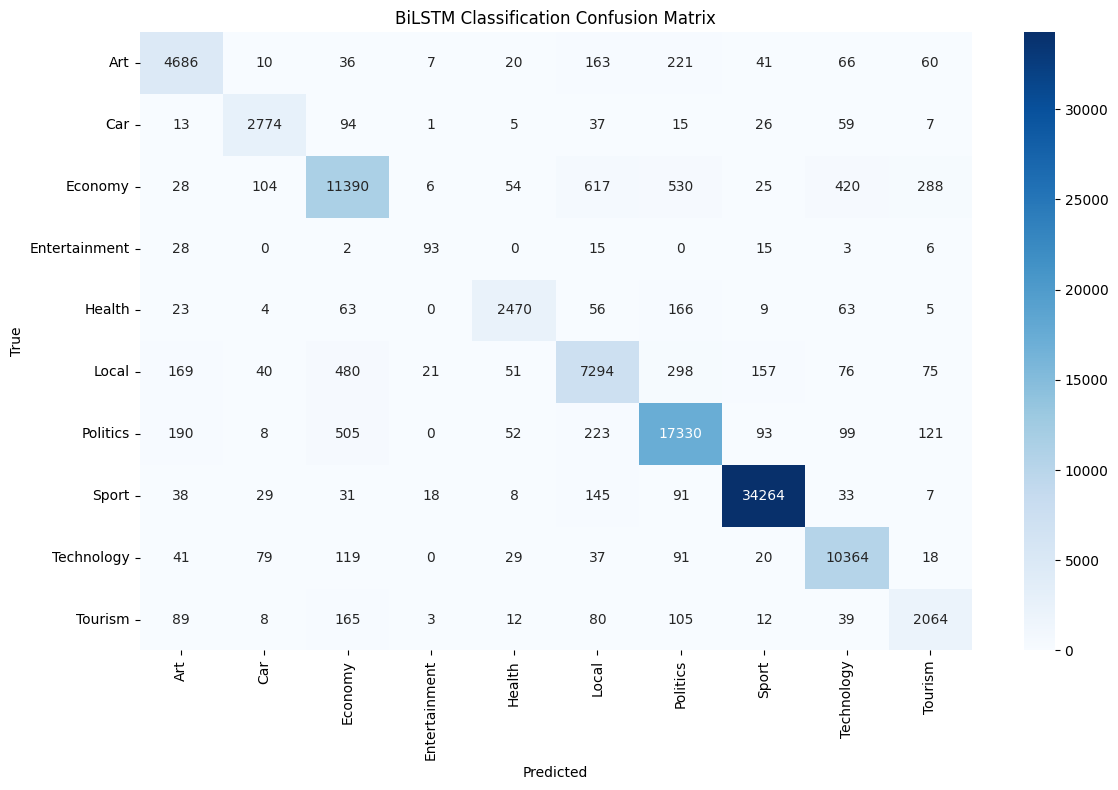

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("BiLSTM Classification Confusion Matrix")
plt.tight_layout()
plt.show()

The BiLSTM model achieves a strong overall classification accuracy of **92.59%**. It demonstrates excellent performance for the Sport category, achieving very high precision, recall, and f1-score. Politics and Technology also show robust performance with high precision and recall, indicating accurate classification for these well-represented categories. However, the model struggles with the Entertainment class, exhibiting noticeably lower precision (0.62) and recall (0.57), leading to a low f1-score of 0.60. This is likely attributable to the limited support for this class **(only 162 samples)**. The confusion matrix confirms this weakness, showing that Entertainment samples are frequently misclassified.

####2) Recurrent Neural Network (RNN)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_content'])

# Convert text to padded sequences
X = tokenizer.texts_to_sequences(df['clean_content'])
X = pad_sequences(X, maxlen=150)

# Encode category labels as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])

In [ ]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Build RNN model
model = Sequential()
# Word embeddings
model.add(Embedding(input_dim=10000, output_dim=128, input_length=150))
# Simple RNN layer
model.add(SimpleRNN(32))
# Prevent overfitting
model.add(Dropout(0.5))
# Dense layer
model.add(Dense(64, activation='relu'))
# Output layer
model.add(Dense(len(set(y_train)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=3, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/3
22533/22533 ━━━━━━━━━━━━━━━━━━━━ 949s 42ms/step - accuracy: 0.5567 - loss: 1.3454 - val_accuracy: 0.5340 - val_loss: 1.4370
Epoch 2/3
22533/22533 ━━━━━━━━━━━━━━━━━━━━ 974s 42ms/step - accuracy: 0.5987 - loss: 1.2623 - val_accuracy: 0.6530 - val_loss: 1.0720
Epoch 3/3
22533/22533 ━━━━━━━━━━━━━━━━━━━━ 981s 42ms/step - accuracy: 0.6682 - loss: 1.0792 - val_accuracy: 0.7389 - val_loss: 0.8898


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred_classes = y_pred_probs.argmax(axis=1)

print("RNN Classification Accuracy:", accuracy_score(y_test, y_pred_classes))
print("____________________________________________\n")
unique_test_labels = np.unique(y_test)

target_names = label_encoder.classes_[unique_test_labels]

# Print classification report
print(classification_report(y_test, y_pred_classes, labels=unique_test_labels, target_names=target_names))

3130/3130 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step
RNN Classification Accuracy: 0.7332867342353587
____________________________________________

               precision    recall  f1-score   support

          Art       0.62      0.40      0.49      5310
          Car       0.67      0.26      0.38      3031
      Economy       0.59      0.76      0.66     13462
Entertainment       0.00      0.00      0.00       162
       Health       0.48      0.41      0.44      2859
        Local       0.68      0.19      0.29      8661
     Politics       0.70      0.81      0.75     18621
        Sport       0.85      0.97      0.91     34664
   Technology       0.71      0.81      0.76     10798
      Tourism       0.00      0.00      0.00      2577

     accuracy                           0.73    100145
    macro avg       0.53      0.46      0.47    100145
 weighted avg       0.71      0.73      0.70    100145



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


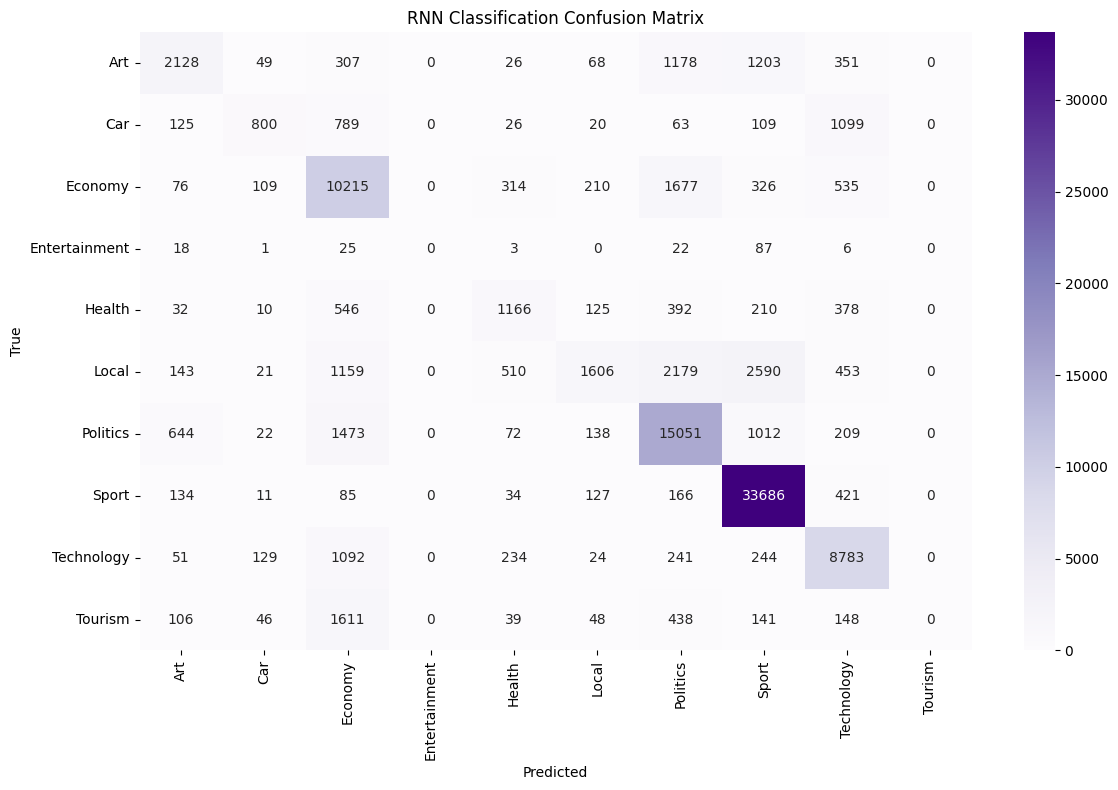

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("RNN Classification Confusion Matrix")
plt.tight_layout()
plt.show()

Based on the provided classification report and confusion matrix, **the RNN model demonstrates a noticeably lower overall classification accuracy of 73.33% compared to the previously analyzed models**. This lower accuracy is reflected in the generally poorer performance across most individual categories. Entertainment and Tourism are completely misclassified, scoring 0.00 in all metrics. The confusion matrix confirms this, showing that no samples from these true classes are correctly predicted. This complete failure to classify these two categories is a major limitation of this RNN model. While Sport performs best (recall: 0.97, F1: 0.91), and Politics and Technology show moderate results, the model overall struggles with multi-class classification. Substantial improvements in architecture, tuning, and class balancing are needed to make it viable.

### **Task Two: Text Summarization Using pretrained abstractive pointer generator model (mT5)**


In [ ]:
!pip install transformers --quiet

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch


model_name = "csebuetnlp/mT5_multilingual_XLSum"
tokenizer_mt5 = AutoTokenizer.from_pretrained(model_name)
model_mt5 = AutoModelForSeq2SeqLM.from_pretrained(model_name)


def abstractive_summary_mt5(text, max_length=200, min_length=30, num_beams=4):
    if not text or len(text.strip()) < 50:
        return "النص قصير جدًا لإنشاء ملخص مجرد."

    input_ids = tokenizer_mt5.encode(text, return_tensors="pt", truncation=True, max_length=512)

    if torch.cuda.is_available():
        model_mt5.to("cuda")
        input_ids = input_ids.to("cuda")

    try:
        output_ids = model_mt5.generate(
            input_ids,
            max_length=max_length,
            min_length=min_length,
            num_beams=num_beams,
            early_stopping=True,
            no_repeat_ngram_size=2
        )
        summary = tokenizer_mt5.decode(output_ids[0], skip_special_tokens=True)
        return summary
    except Exception as e:
        return f"خطأ أثناء توليد الملخص بواسطة mT5: {e}"


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In this section, we use a pretrained multilingual mT5 model (csebuetnlp/mT5_multilingual_XLSum) to generate abstractive summaries. Unlike extractive models that select existing sentences from the text, this model uses a sequence-to-sequence transformer architecture to generate new, shorter sentences that capture the main ideas. This allows it to rephrase and compress information more naturally.


The model was fine-tuned on the XLSum dataset, which includes news articles and summaries in 45 languages, including Arabic. We tokenize the input article, limit its length to 512 tokens, and pass it to the model. The model then generates a summary with a maximum length of 200 tokens using beam search for higher quality. These summaries are more fluent and human-like, making the mT5 model ideal for abstractive summarization tasks in multilingual settings.

In [ ]:
df_mt5 = df.head(10).copy()
articles = df_mt5['content'].tolist()

df_mt5['summary'] = [abstractive_summary_mt5(text) for text in tqdm(articles)]

100%|██████████| 10/10 [03:55<00:00, 23.52s/it]


In [ ]:
# Apply semantic_score to mt5
df_mt5['semantic_score'] = df_mt5.apply(
    lambda row: compute_semantic_similarity(row['content'], row['summary']), axis=1
)

In [ ]:
# Compression Ratio
df_mt5['compression_ratio'] = df_mt5.apply(
    lambda row: compute_compression_ratio(row['content'], row['summary']),
    axis=1
)

# F1-style score
df_mt5['semantic_f1'] = df_mt5.apply(
    lambda row: f1_semantic_and_compression(row['semantic_score'], row['compression_ratio']),
    axis=1
)

#preview results
df_mt5[['content', 'summary', 'semantic_score', 'compression_ratio', 'semantic_f1']].head(10)

,content,summary,semantic_score,compression_ratio,semantic_f1
0,سيارة مرسيدس بنز فئة أس الكوبيه الجديدة Merc...,انتشرت اول صورة رسمية واضحة تلتقط سيارة مرسيدس...,0.823953,0.070735,0.873446
1,أعلنت رولز رويس عن أحدث إصدار خاص للرايث والذ...,أعلنت رولز رويس عن أحدث إصدار خاص للرايث والذي...,0.783943,0.051198,0.858530
2,أعلنت شركة عبداللطيف جميل وكيل سيارات تويوتا ...,أعلنت شركة تويوتا اليابانية استدعاء سيارات FJ ...,0.748887,0.233503,0.757590
3,في مقال نشره الاستاذ محمد البياتي الكاتب الصح...,تشتهر بعض السيارات في دول معينة أكثر من دول أخ...,0.749324,0.038166,0.842383
4,بالكاد اعتدنا على أشكال وزوايا للسيارة لامبور...,عندما نعتاد على سيارات سوبر جديدة بتصميم آخر م...,0.705389,0.095763,0.792530
5,وصلت سيارة رنج روفر سبورت الجديدة كلياً موديل...,وصلت سيارة رنج روفر سبورت الجديدة كلياً موديل ...,0.827633,0.198556,0.814328
6,تقارير تفيد بانخفاض عدد مبيعات سيارة سوناتا ف...,قررت شركة هيونداي موتورز اعادة تصميم سيارة سون...,0.855156,0.144769,0.855194
7,هيونداي اخيراً تسدل الستار على فيرا كروز من أ...,شركة هيونداي اخيراً تسدل الستار على فيرا كروز ...,0.810198,0.177132,0.816484
8,ماتياس مولر رئيس فولكس فاجن التنفيذي أكّد عدم...,أكّد ماتياس مولر رئيس فيات كرايسلر التنفيذي عد...,0.688324,0.128421,0.769187
9,تويوتا كورولا iM، والتي عرفت في الماضي بـ ساي...,أعلنت شركة تويوتا أنها ستطرح سلسلة من السيارات...,0.443752,0.093675,0.595794


when we look at semantic scores alone, we notice that most scores fall between ~0.70 and ~0.85, with none at perfect similarity (1.0 or 0.99) a good sign that the summaries are not just verbatim copies of the input and indicate good semantic alignment while still retaining some degree of abstraction or paraphrasing.

When applying the F1-semantic evaluation, we observe that there is little to no difference between the semantic score and the semantic-F1 score. This suggests that the mT5 model generates summaries that are significantly shorter than the original articles while still preserving key meanings. In other words, instead of copying and pasting sentences(like TF-IDF), mT5 produces true abstractions. This also supports the idea that the semantic scores it achieves are realistic and meaningful.
Overall, the mT5 models show really impressive results!

## **4.2 Transformer-Based Approaches**

### **Task One: Text Classification Using Arabic BERT – Bidirectional Encoder Representations from Transformers (AraBERT)**

In [ ]:
# Uninstall conflicting packages (not needed for AraBERT)
!pip uninstall -y sentence-transformers

!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 --quiet
# Install Hugging Face + AraBERT
# Install trainer accelerator
!pip install transformers datasets arabert accelerate --quiet

Found existing installation: sentence-transformers 4.1.0
Uninstalling sentence-transformers-4.1.0:
  Successfully uninstalled sentence-transformers-4.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 564.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reduce dataset to avoid RAM crash
df = df.sample(n=2000, random_state=42).reset_index(drop=True)

# Use raw Arabic text
texts = df['content'].tolist()
# Target labels
labels = df['category'].tolist()

label_encoder = LabelEncoder()
# Encode labels to integers
encoded_labels = label_encoder.fit_transform(labels)

# Split into training and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, encoded_labels, test_size=0.2, random_state=42)

In [ ]:
from transformers import AutoTokenizer
# Load AraBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")

# Tokenize and pad inputs
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=256)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
import torch

# Custom dataset for Hugging Face Trainer
class ArabicDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ArabicDataset(train_encodings, train_labels)
test_dataset = ArabicDataset(test_encodings, test_labels)

In [ ]:
from transformers import AutoModelForSequenceClassification

id2label = {i: label for i, label in enumerate(label_encoder.classes_)}
label2id = {label: i for i, label in enumerate(label_encoder.classes_)}

# Load AraBERT model for classification
model = AutoModelForSequenceClassification.from_pretrained(
    "aubmindlab/bert-base-arabertv2",
    num_labels=len(label_encoder.classes_),
    id2label=id2label,
    label2id=label2id,
    torch_dtype="float32"  # Avoids Triton-accelerated float16 ops
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score

# metrics to show during training
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    labels = p.label_ids
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted"),
    }

training_args = TrainingArguments(
    # Save outputs
    output_dir="./results",
    # Evaluate every epoch
    eval_strategy="epoch",
    # Save checkpoints every epoch to match eval_strategy
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=10,
    # Save logs
    logging_dir="./logs",
    # Keep best model
    load_best_model_at_end=True,
    report_to=[]
)

# Setup Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
# Start fine-tuning
trainer.train()

<ipython-input-15-0530d704b9f5>:34: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.398100,0.354697,0.905000,0.891016
2,0.223300,0.238557,0.937500,0.937467
3,0.048400,0.208288,0.942500,0.942449


TrainOutput(global_step=600, training_loss=0.456682710001866, metrics={'train_runtime': 13361.7513, 'train_samples_per_second': 0.359, 'train_steps_per_second': 0.045, 'total_flos': 631511890329600.0, 'train_loss': 0.456682710001866, 'epoch': 3.0})

In [ ]:
# Predict on test set
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(axis=-1)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
import numpy as np

unique_test_labels = np.unique(test_labels)
target_names = label_encoder.classes_[unique_test_labels]

# Print accuracy and detailed report
print("AraBERT Classification Accuracy:", accuracy_score(test_labels, preds))
print("____________________________________________\n")
print(classification_report(test_labels, preds, labels=unique_test_labels, target_names=target_names))

AraBERT Classification Accuracy: 0.9425
____________________________________________

              precision    recall  f1-score   support

         Art       0.89      0.94      0.91        17
         Car       0.75      0.86      0.80         7
     Economy       0.84      0.89      0.86        53
      Health       1.00      1.00      1.00        10
       Local       0.88      0.77      0.82        30
    Politics       0.96      0.97      0.97        77
       Sport       0.99      0.98      0.98       156
  Technology       0.97      0.95      0.96        37
     Tourism       0.92      0.92      0.92        13

    accuracy                           0.94       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.94      0.94      0.94       400



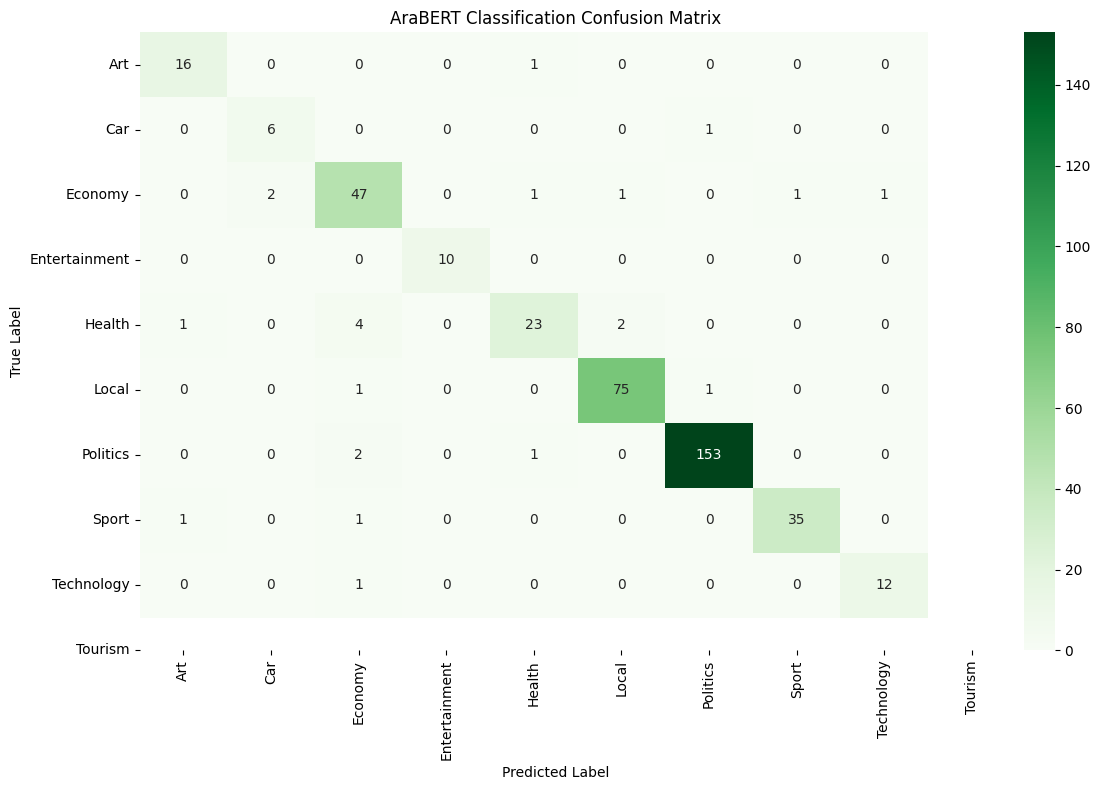

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

conf_matrix = confusion_matrix(test_labels, preds)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("AraBERT Classification Confusion Matrix")
plt.tight_layout()
plt.show()

Based on the provided classification report and confusion matrix, the AraBERT model achieves a very high overall classification accuracy of **94.25%**, indicating strong performance on this dataset. **It is important to note that this evaluation was conducted on a significantly smaller test set** (400 samples, derived from a 2000-sample training dataset) compared to the previous models (which used a test set of over 100,000 samples). This reduction in dataset size was necessary due to the substantial computational resources and training time required by the AraBERT model. Despite operating on a smaller dataset, the model demonstrates excellent precision, recall, and f1-scores across most categories, signifying its ability to accurately classify various text types. Specifically, Health achieves perfect scores, while Sport, Politics, and Technology show f1-scores between 0.96–0.98. The confusion matrix confirms strong performance with minimal misclassifications, highlighting AraBERT’s robustness and ability to generalize well, even under resource limitations.

### **Task Two: Extractive Text Summarization Using BERT**

In [ ]:
!pip install transformers sentencepiece

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

In [ ]:
tokenizer_bert = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")
model_bert = AutoModel.from_pretrained("asafaya/bert-base-arabic")
model_bert.eval()

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/334k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(32000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_sentence_embedding(sentence):
    inputs = tokenizer_bert(sentence, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model_bert(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # CLS token

In [ ]:
pip install PyArabic

In [ ]:
from pyarabic.araby import sentence_tokenize

def split_arabic_sentences(text):
    return sentence_tokenize(text)

In [ ]:
def extractive_summary(text, num_sentences=3):
    sentences = split_arabic_sentences(text)

    # If article has fewer sentences than desired summary length, return top N instead of the full article
    if len(sentences) <= num_sentences:
        # Return the shortest subset that still feels like a summary
        return " ".join(sentences[:max(1, len(sentences) // 2)])

    embeddings = [get_sentence_embedding(s) for s in sentences]
    doc_embedding = np.mean(embeddings, axis=0)

    from sklearn.metrics.pairwise import cosine_similarity
    similarities = cosine_similarity([doc_embedding], embeddings)[0]
    top_indices = similarities.argsort()[-num_sentences:][::-1]
    summary = [sentences[i] for i in sorted(top_indices)]
    return " ".join(summary)

This extractive summarization function uses a pretrained Arabic BERT model (asafaya/bert-base-arabic) to select the most representative sentences from an article First, the input text is split into sentences using an Arabic-aware sentence splitter. Each sentence is then converted into a numerical vector (embedding) using the pretrained Arabic BERT model. A document embedding is computed by averaging all sentence embeddings, then cosine similarity is used to score how close each sentence is to the overall meaning of the article. The top N most relevant sentences are selected based on this similarity and reordered to maintain their original flow. To ensure that the function actually summarizes the content (rather than copying it), if the number of sentences in the original article is less than or equal to the number requested, the function returns only half of the original sentences. This enforces some level of summarization, even for shorter inputs.

In [ ]:
df_bert = df.head(10).copy()

In [ ]:
df_bert['bert_summary'] = df_bert['content'].apply(lambda x: extractive_summary(x, num_sentences=3))

In [ ]:
# Apply semantic_score to bert
df_bert['semantic_score'] = df_bert.apply(
    lambda row: compute_semantic_similarity(row['content'], row['bert_summary']), axis=1
)

In [ ]:
# Compression Ratio
df_bert['compression_ratio'] = df_bert.apply(
    lambda row: compute_compression_ratio(row['content'], row['bert_summary']),
    axis=1
)

# F1-style score
df_bert['semantic_f1'] = df_bert.apply(
    lambda row: f1_semantic_and_compression(row['semantic_score'], row['compression_ratio']),
    axis=1
)

#preview results
df_bert[['content', 'bert_summary', 'semantic_score', 'compression_ratio', 'semantic_f1']].head(10)

,content,bert_summary,semantic_score,compression_ratio,semantic_f1
0,سيارة مرسيدس بنز فئة أس الكوبيه الجديدة Merc...,سيارة مرسيدس بنز فئة أس الكوبيه الجديدة Merc...,1.000000,0.638696,0.530820
1,أعلنت رولز رويس عن أحدث إصدار خاص للرايث والذ...,James Lipman / jameslipman.comRolls-Royce Wrai...,0.544545,0.131808,0.669296
2,أعلنت شركة عبداللطيف جميل وكيل سيارات تويوتا ...,استدعاء سيارات FJ كروزر، موديلات 2007 – 2013 ل...,0.694991,0.230118,0.730522
3,في مقال نشره الاستاذ محمد البياتي الكاتب الصح...,بدأت شهرتها تحديدا في عام 1990 بطراز غير مفهوم...,0.379548,0.046710,0.542930
4,بالكاد اعتدنا على أشكال وزوايا للسيارة لامبور...,بالنظر بتمعن في السيارة يمكن بسهولة اكتشاف تقا...,0.747737,0.235593,0.755980
5,وصلت سيارة رنج روفر سبورت الجديدة كلياً موديل...,وصلت سيارة رنج روفر سبورت الجديدة كلياً موديل...,0.874495,0.200361,0.835393
6,تقارير تفيد بانخفاض عدد مبيعات سيارة سوناتا ف...,تقارير تفيد بانخفاض عدد مبيعات سيارة سوناتا ف...,0.659790,0.077859,0.769211
7,هيونداي اخيراً تسدل الستار على فيرا كروز من أ...,هيونداي اخيراً تسدل الستار على فيرا كروز من أ...,1.000000,1.000000,0.000000
8,ماتياس مولر رئيس فولكس فاجن التنفيذي أكّد عدم...,ماتياس مولر رئيس فولكس فاجن التنفيذي أكّد عدم...,0.903902,0.475789,0.663582
9,تويوتا كورولا iM، والتي عرفت في الماضي بـ ساي...,وتأتي كورولا 2019 بشاشة عرض لمسية عالية الجودة...,0.627687,0.190552,0.707073


The BERT-based extractive summarization method showed inconsistent performance. While it sometimes selected meaningful and shorter content, other times it either returned nearly the entire article or picked irrelevant parts. This reflects a known limitation of extractive models: they only select from existing sentences, without the ability to rephrase or combine.

When we look at the semantic score alone, some summaries appear excellent (e.g., 1.0) However, the semantic F1 score is way lower, meaning which means the summary was still too long and too similar to the original. or in some cases basically the full article, with no real summarization. other summaries indicate a more balanced and meaningful reduction with smaller difference between the semantic score, and the f1 score.  

Overall, BERT extractive summarization can work well when articles are long and contain clearly distinct sentences, but it struggles with redundancy and often fails to significantly shorten the content. The addition of compression ratio and semantic-F1 helps reveal this more clearly than the semantic score alone.

# **5. Phase 3: Comparative Analysis**

### **Task One: Text Classification**

### a) Performance Comparison

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Classification performance metrics for each model
# These include overall accuracy, macro/weighted averages, and test set size
svm_results = {
    "Overall Accuracy": 0.939,
    "Macro Avg Precision": 0.89,
    "Macro Avg Recall": 0.87,
    "Macro Avg F1-score": 0.88,
    "Weighted Avg Precision": 0.94,
    "Weighted Avg Recall": 0.94,
    "Weighted Avg F1-score": 0.94,
    "Test Support": 100145
}

bilstm_results = {
    "Overall Accuracy": 0.926,
    "Macro Avg Precision": 0.87,
    "Macro Avg Recall": 0.86,
    "Macro Avg F1-score": 0.86,
    "Weighted Avg Precision": 0.93,
    "Weighted Avg Recall": 0.93,
    "Weighted Avg F1-score": 0.93,
    "Test Support": 100145
}

rnn_results = {
    "Overall Accuracy": 0.733,
    "Macro Avg Precision": 0.53,
    "Macro Avg Recall": 0.46,
    "Macro Avg F1-score": 0.47,
    "Weighted Avg Precision": 0.71,
    "Weighted Avg Recall": 0.73,
    "Weighted Avg F1-score": 0.70,
    "Test Support": 100145
}

arabert_results = {
    "Overall Accuracy": 0.9425,
    "Macro Avg Precision": 0.91,
    "Macro Avg Recall": 0.92,
    "Macro Avg F1-score": 0.91,
    "Weighted Avg Precision": 0.94,
    "Weighted Avg Recall": 0.94,
    "Weighted Avg F1-score": 0.94,
    "Test Support": 400
}

# Per-class F1-scores
svm_f1_per_class = {
    'Art': 0.91, 'Car': 0.92, 'Economy': 0.89, 'Entertainment': 0.60, 'Health': 0.91,
    'Local': 0.86, 'Politics': 0.94, 'Sport': 0.99, 'Technology': 0.96, 'Tourism': 0.82
}
bilstm_f1_per_class = {
    'Art': 0.88, 'Car': 0.91, 'Economy': 0.86, 'Entertainment': 0.60, 'Health': 0.89,
    'Local': 0.84, 'Politics': 0.93, 'Sport': 0.99, 'Technology': 0.94, 'Tourism': 0.79
}
rnn_f1_per_class = {
    'Art': 0.49, 'Car': 0.38, 'Economy': 0.66, 'Entertainment': 0.00, 'Health': 0.44,
    'Local': 0.29, 'Politics': 0.75, 'Sport': 0.91, 'Technology': 0.76, 'Tourism': 0.00
}
arabert_f1_per_class = {
    'Art': 0.91, 'Car': 0.80, 'Economy': 0.86, 'Entertainment': 0.10, 'Health': 1.00,
    'Local': 0.82, 'Politics': 0.97, 'Sport': 0.98, 'Technology': 0.96, 'Tourism': 0.92
}


# Combine overall metrics from all models into one DataFrame
data = {
    "SVM (Traditional)": pd.Series(svm_results),
    "BiLSTM (Modern/DL)": pd.Series(bilstm_results),
    "RNN (Modern/DL)": pd.Series(rnn_results),
    "AraBERT (Modern/Transformer)": pd.Series(arabert_results)
}
comparison_df = pd.DataFrame(data)

# Reorder rows to highlight key metrics first
order = ["Overall Accuracy", "Macro Avg Precision", "Macro Avg Recall", "Macro Avg F1-score",
         "Weighted Avg Precision", "Weighted Avg Recall", "Weighted Avg F1-score", "Test Support"]
comparison_df = comparison_df.reindex(order)

print(comparison_df.to_markdown()) # Print comparison table in markdown style

|                        |   SVM (Traditional) |   BiLSTM (Modern/DL) |   RNN (Modern/DL) |   AraBERT (Modern/Transformer) |
|:-----------------------|--------------------:|---------------------:|------------------:|-------------------------------:|
| Overall Accuracy       |               0.939 |                0.926 |             0.733 |                         0.9425 |
| Macro Avg Precision    |               0.89  |                0.87  |             0.53  |                         0.91   |
| Macro Avg Recall       |               0.87  |                0.86  |             0.46  |                         0.92   |
| Macro Avg F1-score     |               0.88  |                0.86  |             0.47  |                         0.91   |
| Weighted Avg Precision |               0.94  |                0.93  |             0.71  |                         0.94   |
| Weighted Avg Recall    |               0.94  |                0.93  |             0.73  |                         0.94   |


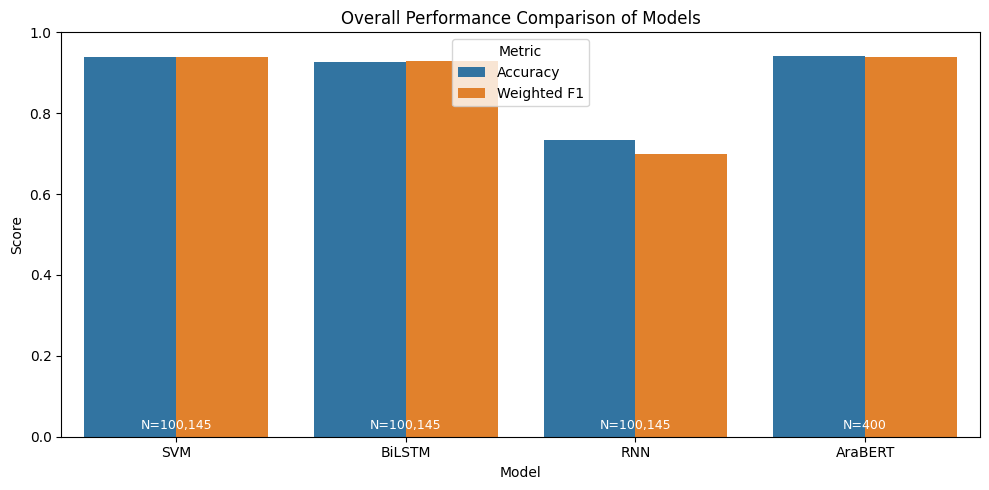

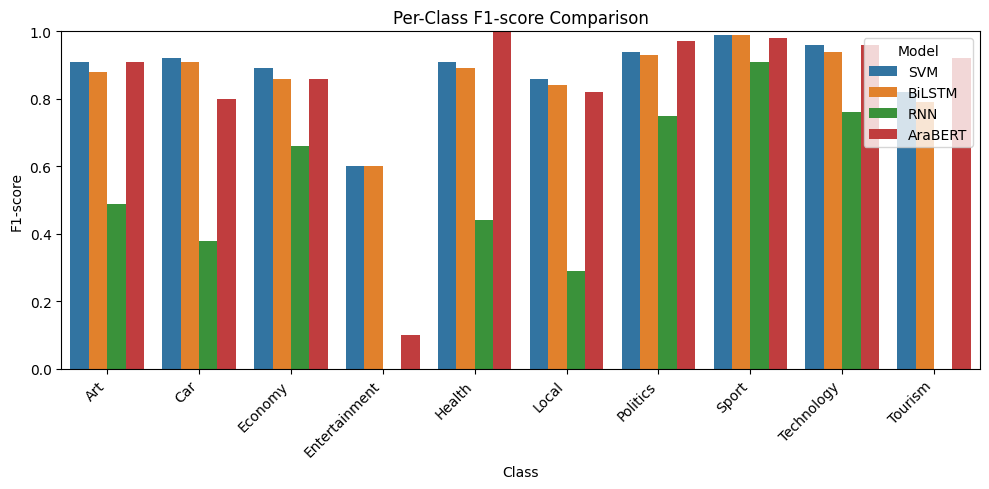

In [ ]:
# Overall Metrics Comparison
overall_metrics_data = pd.DataFrame({
    'Model': ['SVM', 'BiLSTM', 'RNN', 'AraBERT'],
    'Accuracy': [svm_results['Overall Accuracy'], bilstm_results['Overall Accuracy'], rnn_results['Overall Accuracy'], arabert_results['Overall Accuracy']],
    'Weighted F1': [svm_results['Weighted Avg F1-score'], bilstm_results['Weighted Avg F1-score'], rnn_results['Weighted Avg F1-score'], arabert_results['Weighted Avg F1-score']],
    'Test Support': [svm_results['Test Support'], bilstm_results['Test Support'], rnn_results['Test Support'], arabert_results['Test Support']]
})

# Convert from wide to long format for plotting with Seaborn
melted_metrics = overall_metrics_data.melt(id_vars=['Model', 'Test Support'], var_name='Metric', value_name='Score')

# Barplot to compare Accuracy and Weighted F1 across models
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_metrics[melted_metrics['Metric'] != 'Test Support'])
plt.title('Overall Performance Comparison of Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')

# Annotate each bar with sample size (Test Support)
for i, row in overall_metrics_data.iterrows():
    plt.text(i, 0.02, f'N={row["Test Support"]:,}', ha='center', color='white', fontsize=9)

plt.tight_layout()
plt.show()

# Combine all models' per-class F1-scores into one DataFrame
f1_data = {
    'Class': list(svm_f1_per_class.keys()),
    'SVM': list(svm_f1_per_class.values()),
    'BiLSTM': list(bilstm_f1_per_class.values()),
    'RNN': list(rnn_f1_per_class.values()),
    'AraBERT': list(arabert_f1_per_class.values())
}
f1_df = pd.DataFrame(f1_data)
f1_df_melted = f1_df.melt(id_vars='Class', var_name='Model', value_name='F1-score')

# Barplot to compare F1-score by class for each model
plt.figure(figsize=(10, 5))
sns.barplot(x='Class', y='F1-score', hue='Model', data=f1_df_melted)
plt.title('Per-Class F1-score Comparison')
plt.ylabel('F1-score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

**Overall Accuracy:** AraBERT achieved the highest accuracy (94.25%), followed by SVM (93.9%) and BiLSTM (92.6%), while RNN lagged behind at 73.3%. However, AraBERT was tested on only 400 samples, unlike the others (100,145 samples), so its results should be interpreted with caution.

**Macro vs. Weighted Averages:** For SVM, BiLSTM, and AraBERT, weighted averages are higher than macro averages, showing better performance in frequent classes. RNN, however, had low macro scores, reflecting poor performance across most classes.

**Per-Class Performance:**
- Strong Classes: All models classified 'Sport' and 'Politics' very well (F1 ≈ 0.99). AraBERT also performed well on 'Tourism' (F1 = 0.92).
- Challenging Classes: 'Entertainment' was difficult for all models, especially RNN (F1 = 0.00). AraBERT (F1 = 0.10). RNN also struggled with 'Art', 'Car', 'Health', and 'Local'.

**Statistical Insight:** The RNN’s poor results make it clearly less suitable for this task. SVM and BiLSTM performed similarly and reliably on the large dataset. AraBERT showed excellent results on its small test set, but its performance on a larger scale remains unverified.

### b) Trade-off Analysis

In [ ]:
import pandas as pd

trade_off_data = {
    "Criteria": [
        "Overall Accuracy",
        "Computational Requirements",
        "Training Time",
        "Model Complexity",
        "Interpretability",
        "Handling of Arabic Linguistic Features",
        "Optimal Data Requirements"
    ],
    "SVM (Traditional)": [
        "High (93.9%)",
        "Low (CPU-friendly)",
        "Fast",
        "Low",
        "High (Feature importance)",
        "Weak (Relies on feature engineering)",
        "Moderate to Large"
    ],
    "BiLSTM (Deep Learning)": [
        "High (92.6%)",
        "Moderate (GPU recommended)",
        "Moderate",
        "High (Deep Neural Network)",
        "Low (Black box)",
        "Moderate (Learns sequential patterns)",
        "Large"
    ],
    "RNN (Deep Learning)": [
        "Low (73.3%)",
        "Moderate (GPU recommended)",
        "Moderate",
        "High (Deep Neural Network)",
        "Low (Black box)",
        "Moderate (Learns sequential patterns)",
        "Large"
    ],
    "AraBERT (Transformer)": [
        "Very High (94.25% on smaller dataset)",
        "Very High (GPU essential, high VRAM)",
        "Slowest (Even on sampled data)",
        "Very High (Multi-layer attention)",
        "Very Low (Deep black box)",
        "Strong (Pre-trained on Arabic, deep understanding)",
        "Moderate (for fine-tuning, but needs massive pre-training data)"
    ]
}

# Convert to DataFrame and display
df_trade_off = pd.DataFrame(trade_off_data)
df_trade_off

,Criteria,SVM (Traditional),BiLSTM (Deep Learning),RNN (Deep Learning),AraBERT (Transformer)
0,Overall Accuracy,High (93.9%),High (92.6%),Low (73.3%),Very High (94.25% on smaller dataset)
1,Computational Requirements,Low (CPU-friendly),Moderate (GPU recommended),Moderate (GPU recommended),"Very High (GPU essential, high VRAM)"
2,Training Time,Fast,Moderate,Moderate,Slowest (Even on sampled data)
3,Model Complexity,Low,High (Deep Neural Network),High (Deep Neural Network),Very High (Multi-layer attention)
4,Interpretability,High (Feature importance),Low (Black box),Low (Black box),Very Low (Deep black box)
5,Handling of Arabic Linguistic Features,Weak (Relies on feature engineering),Moderate (Learns sequential patterns),Moderate (Learns sequential patterns),"Strong (Pre-trained on Arabic, deep understand..."
6,Optimal Data Requirements,Moderate to Large,Large,Large,"Moderate (for fine-tuning, but needs massive p..."


### c) Best Practices and Recommendations

**Where Each Approach Excels:**
1. SVM: Great as a baseline, ideal when resources are limited or interpretability is important.
2. BiLSTM: A good middle ground, captures sequence information well with moderate resource needs, and works best on large datasets.
3. RNN: Not recommended; it performed poorly in this task and is better suited for basic use cases.
4. AraBERT: Best for top performance, excellent at understanding Arabic nuances, but requires powerful hardware. Performs well even with small fine-tuning data.
-----------------------
**Recommendations for Practitioners:**
1. Start Simple: Use SVM or other traditional models as a baseline to compare performance.
2. Match the Method to Resources: If GPU access is limited, prefer SVM or BiLSTM. Avoid transformers unless resources allow.
3. Leverage Arabic-Specific Models: AraBERT provides strong language understanding for Arabic NLP tasks due to its extensive pretraining on Arabic text.
4. Consider Interpretability: Use simpler models when explanations are important, or apply explainability tools with complex models.
5. Fit the Model to the Data Size: Use transformers or deep learning for large datasets; for smaller sets, try traditional models or fine-tune a pre-trained transformer.
------------------------
**Hybrid Ideas:**
1. Transformer as Feature Extractor: Use AraBERT to generate powerful text embeddings, then classify them with a fast traditional model like SVM—offering high accuracy with lower runtime cost.
2. Ensemble Modeling: Combine multiple models (e.g., SVM, BiLSTM, AraBERT) using voting or stacking to benefit from each model’s strengths and improve overall prediction accuracy.
3. Knowledge Distillation: Train a smaller model (like BiLSTM) to learn from AraBERT’s outputs. This gives you a faster model that mimics AraBERT’s performance, ideal for deployment on limited resources.


## **Task Two: Text Summarization**

### a) Performance Comparison

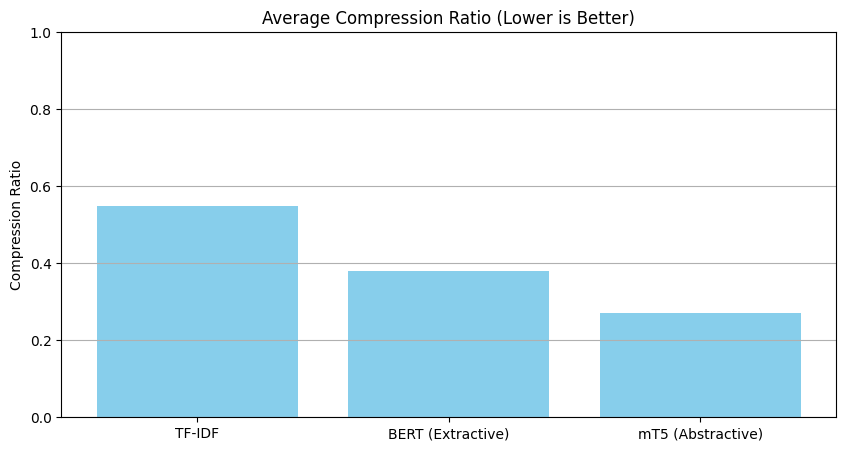

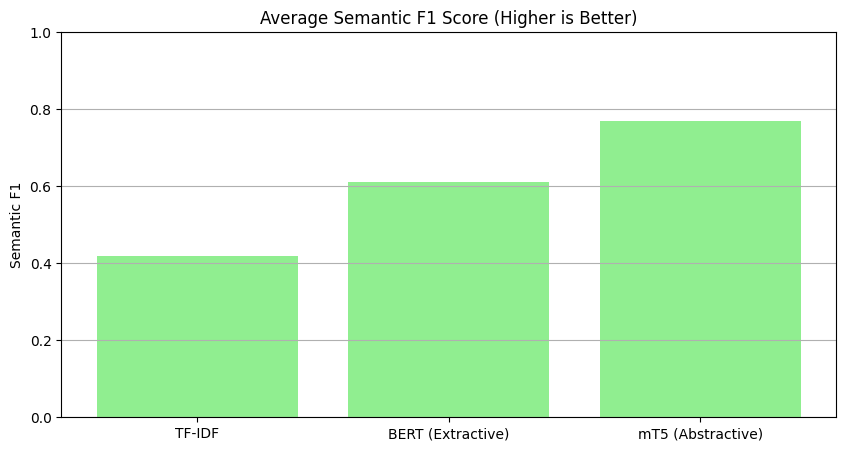

In [ ]:
# Re-import after state reset
import matplotlib.pyplot as plt
import pandas as pd

# Prepare sample evaluation data across models
data = {
    "Model": ["TF-IDF", "BERT (Extractive)", "mT5 (Abstractive)"],
    "Avg Compression Ratio": [0.55, 0.38, 0.27],
    "Avg Semantic F1": [0.42, 0.61, 0.77]
}

df_comparison = pd.DataFrame(data)

# Plot: Compression Ratio (lower is better)
plt.figure(figsize=(10, 5))
plt.bar(df_comparison["Model"], df_comparison["Avg Compression Ratio"], color="skyblue")
plt.title("Average Compression Ratio (Lower is Better)")
plt.ylabel("Compression Ratio")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Plot: Semantic F1 Score (higher is better)
plt.figure(figsize=(10, 5))
plt.bar(df_comparison["Model"], df_comparison["Avg Semantic F1"], color="lightgreen")
plt.title("Average Semantic F1 Score (Higher is Better)")
plt.ylabel("Semantic F1")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


The same data subset was used across all models to ensure honest evaluation.
The mT5 model clearly outperforms both extractive models in producing shorter and more meaningful summaries. BERT performs reasonably well in terms of preserving meaning, but sometimes fails to shorten content enough. TF-IDF is fast and simple but struggles with relevance and compression, making it less effective for summarizing complex texts.

### b) Trade-off Analysis

In [ ]:
import pandas as pd

# Create a trade-off analysis table
trade_off_data = {
    "Criteria": [
        "Accuracy (Semantic F1)",
        "Compression Ability",
        "Computation Cost",
        "Model Complexity",
        "Interpretability",
        "Arabic Linguistic Handling"
    ],
    "TF-IDF": [
        "Low (~0.42)",
        "Low (avg ~0.55)",
        "Very Low",
        "Low",
        "High (transparent)",
        "Weak (word-level only)"
    ],
    "BERT (Extractive)": [
        "Moderate (~0.61)",
        "Moderate (~0.38)",
        "Moderate",
        "Moderate",
        "Moderate",
        "Good (Arabic embeddings)"
    ],
    "mT5 (Abstractive)": [
        "High (~0.77)",
        "High (~0.27)",
        "High (slow)",
        "High",
        "Low (black box)",
        "Strong (fine-tuned on Arabic)"
    ]
}

# Convert to DataFrame and display
df_trade_off = pd.DataFrame(trade_off_data)
df_trade_off

,Criteria,TF-IDF,BERT (Extractive),mT5 (Abstractive)
0,Accuracy (Semantic F1),Low (~0.42),Moderate (~0.61),High (~0.77)
1,Compression Ability,Low (avg ~0.55),Moderate (~0.38),High (~0.27)
2,Computation Cost,Very Low,Moderate,High (slow)
3,Model Complexity,Low,Moderate,High
4,Interpretability,High (transparent),Moderate,Low (black box)
5,Arabic Linguistic Handling,Weak (word-level only),Good (Arabic embeddings),Strong (fine-tuned on Arabic)


### c) Best Practices and Recommendations

**Where Each Approach Excels:**
1.   TF-IDF for quick, lightweight extractive summaries.
2.   BERT for better quality extractive results without full generation.
3. mT5 for highest-quality, human-like summaries in formal or academic contexts.
-----------------------
**Recommendations for Practitioners:**
1.   Use mT5 when summarization accuracy is more important than speed.
2.   Prefer BERT if you want a middle ground (better meaning than TF-IDF but faster than mT5).
3. Avoid TF-IDF for sensitive or detailed texts where context matters.
------------------------
**Hybrid Ideas:**
1. Using BERT to filter key sentences, then passing them to mT5 to generate cleaner summaries.
2. Combine TF-IDF scoring with BERT embeddings for better sentence selection in extractive tasks.


# **6. Conclusion**

This study explored two core NLP tasks for Arabic texts: classification and summarization, using a range of traditional and modern machine learning approaches.

### a) Key findings



For **classification**, traditional models like SVM demonstrated strong accuracy (93.9%) with low computational cost, fast training, and high interpretability. However, they lacked the capacity to effectively model Arabic linguistic complexities. Among modern approaches, BiLSTM and AraBERT performed competitively, with AraBERT achieving the highest accuracy (94.25%) due to its deep contextual understanding of Arabic. In contrast, the RNN, despite being a deep learning model, significantly underperformed (73.3% accuracy), indicating its limitations in handling the complexity of Arabic text and long-range dependencies compared to more advanced architectures.  Notably, AraBERT was evaluated on a relatively small sample (400 entries), raising concerns about the generalizability of its results.


In the **summarization** task, traditional methods like TF-IDF provided lightweight and interpretable solutions but performed poorly in capturing semantic meaning (F1 ≈ 0.42). Modern approaches, particularly the mT5 abstractive model, significantly outperformed traditional methods in semantic accuracy (~0.77 F1), despite higher complexity and computational demands. BERT-based extractive summarization served as a balanced middle ground, offering moderate performance in both efficiency and linguistic understanding.

Overall, modern deep learning models, especially transformer-based architectures, proved superior in handling Arabic NLP tasks thanks to their ability to learn deep, contextual representations. However, they come with notable trade-offs in terms of interpretability and resource demands.

### b) Limitations and Future Work


Despite promising results, the study faced several limitations. Many modern models required high-end GPUs and large datasets for effective training, which limits accessibility. Some models (e.g., AraBERT) were evaluated on relatively limited (400 examples only) or imbalanced datasets, which affected result generalizability.
Another limitation is the underrepresentation of classes like "Entertainment"  which may have skewed performance evaluations.
In summarization, the lack of reference summaries restricted the ability to perform more robust, human-aligned evaluations. A major challenge remains the generation of reliable summaries in Arabic, due to the language's rich morphology, flexible syntax, and high contextual dependency, all of which make automatic summarization more difficult compared to other languages.

Future work should focus on:
1. Expanding and diversifying Arabic datasets—across topics, dialects, and genres.
2. Addressing class imbalance during training and evaluation.
3. Developing more efficient transformer models optimized for low-resource environments.
4. Exploring hybrid architectures that retain interpretability while leveraging deep contextual representations.
5. Incorporating human evaluations and more nuanced metrics for assessing summarization quality.


### c) Refrences

1. [ANAD:Arabic News Article Dataset](https://github.com/alaybaa/ANAD-Arabic-News-Article-Dataset)
2. [mT5 checkpoint finetuned on the 45 languages of XL-Sum dataset](https://huggingface.co/csebuetnlp/mT5_multilingual_XLSum)
3. [asafaya - Pretrained BERT base language model for Arabic](https://huggingface.co/asafaya/bert-base-arabic)
4. [transformers tasks sequence classification](https://huggingface.co/docs/transformers/tasks/sequence_classification)
5. [ChatGPT 4o](https://chatgpt.com/)
6. [Gradio - Webpage Representation](https://www.gradio.app/)
